In [1]:
import pandas as pd

## Concat

In [5]:
s1 = pd.Series([0, 1], index = ['a', 'b'])
s2 = pd.Series([2, 3, 4], index = ['c', 'd', 'e'])
s3 = pd.Series([5, 6], index = ['f', 'g'])

In [6]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [10]:
pd.concat([s1, s2, s3], axis = 1, sort = False)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [11]:
s4 = pd.concat([s1, s3])

In [12]:
s4

a    0
b    1
f    5
g    6
dtype: int64

In [14]:
pd.concat([s1, s4], axis = 1, join = 'inner')

,0,1
a,0,0
b,1,1


In [17]:
pd.concat([s1, s4], axis = 1, join_axes = [['a', 'c', 'b', 'e']])

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,1.0
e,NaN,NaN


In [20]:
result = pd.concat([s1, s1, s4], keys = ['one', 'two', 'three'])

In [21]:
result

one    a    0
       b    1
two    a    0
       b    1
three  a    0
       b    1
       f    5
       g    6
dtype: int64

In [22]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,0.0,1.0,5.0,6.0


In [24]:
result2 = pd.concat([s1, s1, s4], axis = 1, keys = ['one', 'two', 'three'])

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [27]:
result2

,one,two,three
a,0.0,0.0,0
b,1.0,1.0,1
f,NaN,NaN,5
g,NaN,NaN,6


In [30]:
import numpy as np

In [31]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns = ['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns = ['b', 'd', 'a'])

In [32]:
df1

,a,b,c,d
0,0.085439,-2.823722,-0.922649,-2.022988
1,-0.021703,2.527457,0.061962,1.652310
2,-0.600819,0.877829,1.002810,-0.302203


In [33]:
df2

,b,d,a
0,0.596697,-1.553081,-0.692014
1,-0.932599,-0.283192,1.291718


In [34]:
pd.concat([df1, df2], ignore_index = True)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,a,b,c,d
0,0.085439,-2.823722,-0.922649,-2.022988
1,-0.021703,2.527457,0.061962,1.652310
2,-0.600819,0.877829,1.002810,-0.302203
3,-0.692014,0.596697,NaN,-1.553081
4,1.291718,-0.932599,NaN,-0.283192


# Matplotlib

In [75]:
#시도별 전출입 인구수.xlsx파일을 결측치는 0으로 대체,  첫번째 행을 header로 데이터 프레임 생서
df = pd.read_excel('./datas/시도별 전출입 인구수.xlsx', fillna=0, header=0)

#데이터 프레임의 데이터중 누락값을 찾아서 앞 행의 동일컬럼의 값으로 채웁니다.
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

##서울에서 '충청남도', '경상북도', '강원도' , '전라남도' 로 이동한 인구 데이터 값 선택 (1970~2018)
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'  ], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

In [76]:
df_4.index = df_4.index.map(int)

In [77]:
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts\Batang.ttc'     
font_name= font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

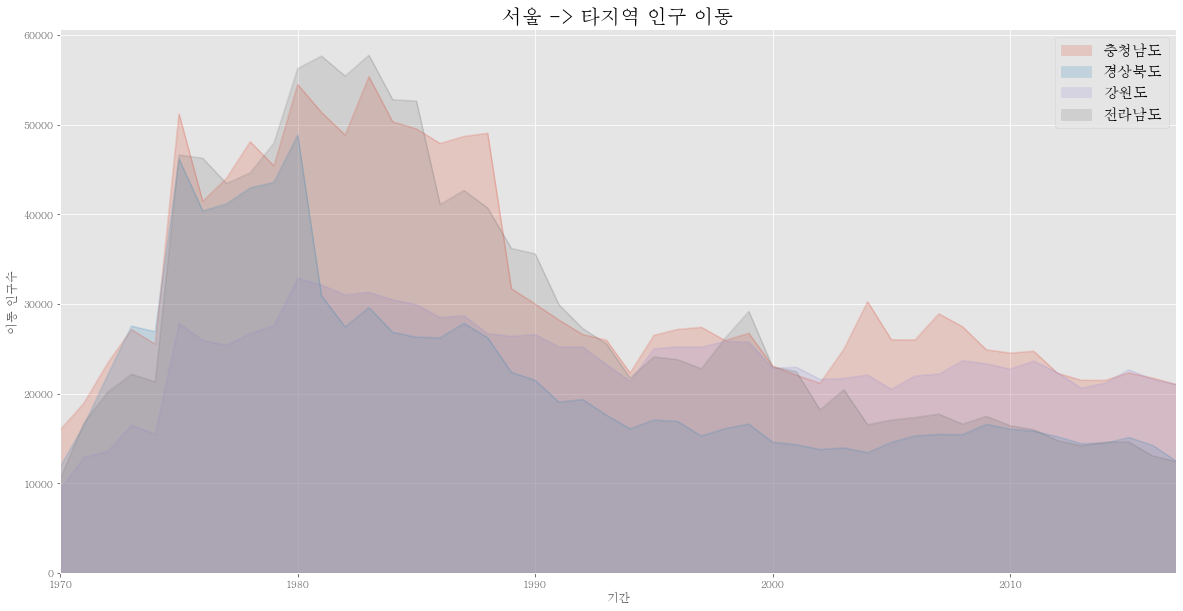

In [78]:
df_4.plot(kind = 'area', stacked = False, alpha = 0.2, figsize = (20, 10))  #stacked: 누적 or not, alpha: 투명도

plt.title('서울 -> 타지역 인구 이동', size = 20)
plt.xlabel('기간', size = 12)
plt.ylabel('이동 인구수', size = 12)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

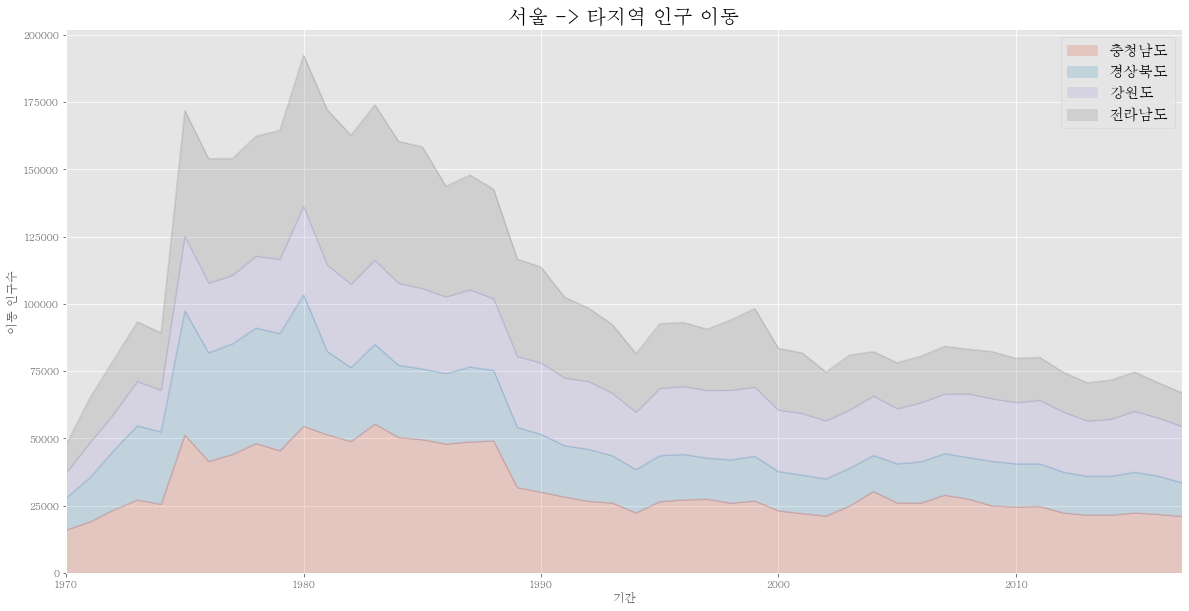

In [79]:
df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))  #stacked: 누적 or not, alpha: 투명도

plt.title('서울 -> 타지역 인구 이동', size = 20)
plt.xlabel('기간', size = 12)
plt.ylabel('이동 인구수', size = 12)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

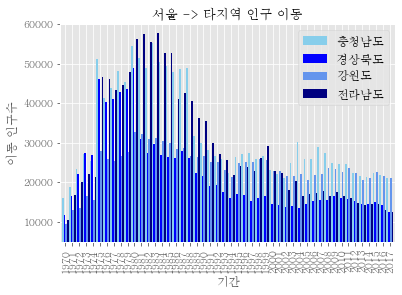

In [80]:
df_4.plot(kind = 'bar', width = 1, color = ['skyblue', 'blue', 'cornflowerblue', 'navy'])
plt.title('서울 -> 타지역 인구 이동', size = 13)
plt.xlabel('기간', size = 12)
plt.ylabel('이동 인구수', size = 12)
plt.legend(loc = 'best', fontsize = 12)
plt.ylim(5000, 60000)

plt.show()

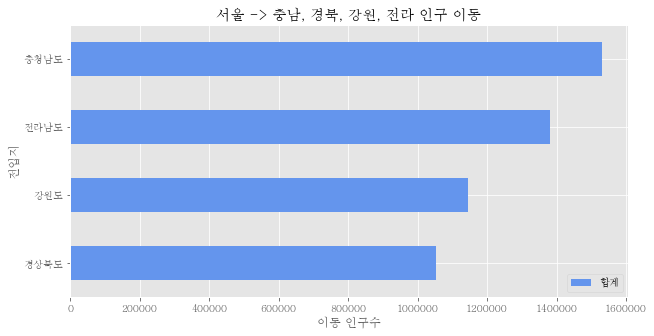

In [81]:
##서울에서 '충청남도', '경상북도', '강원도' , '전라남도' 로 이동한 인구 데이터 값 선택 (1970~2018)
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'  ], col_years]

df_4['합계'] = df_4.sum(axis=1)
df_total =  df_4[['합계']].sort_values(by='합계',  ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot') 

df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

 
# 차트 제목 추가
plt.title('서울 -> 충남, 경북, 강원, 전라 인구 이동')

# 축이름 추가
plt.xlabel('이동 인구수' )
plt.ylabel('전입지')
plt.show()

# Seaborn

In [82]:
import seaborn as sns

In [83]:
titanic = sns.load_dataset('titanic')

### Regplot

In [85]:
#스타일 지정
sns.set_style('darkgrid')   #darkgrid, whitegrid, dark, white, ticks

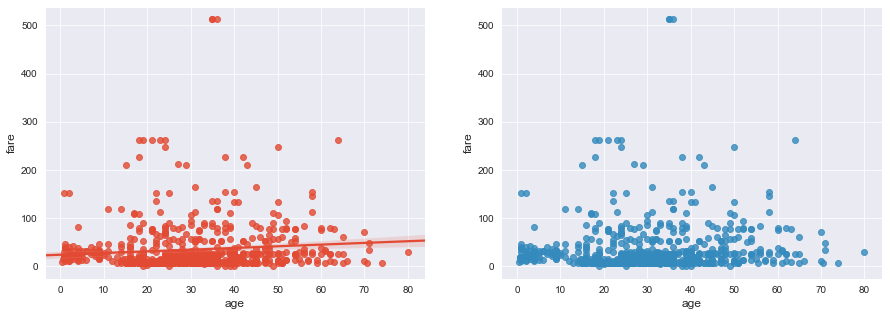

In [88]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x = 'age', y = 'fare', data = titanic, ax = ax1)
sns.regplot(x = 'age', y = 'fare', data = titanic, ax = ax2, fit_reg = False)

In [93]:
table = titanic.pivot_table(index = ['sex'], columns = ['class'], aggfunc = 'size')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


### Heatmap

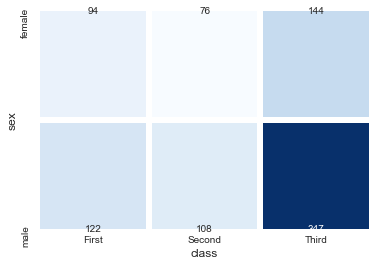

In [102]:
sns.heatmap(table, annot = True, fmt = 'd', cmap = 'Blues', linewidth = 5, cbar = False)
plt.show()

### Boxplot

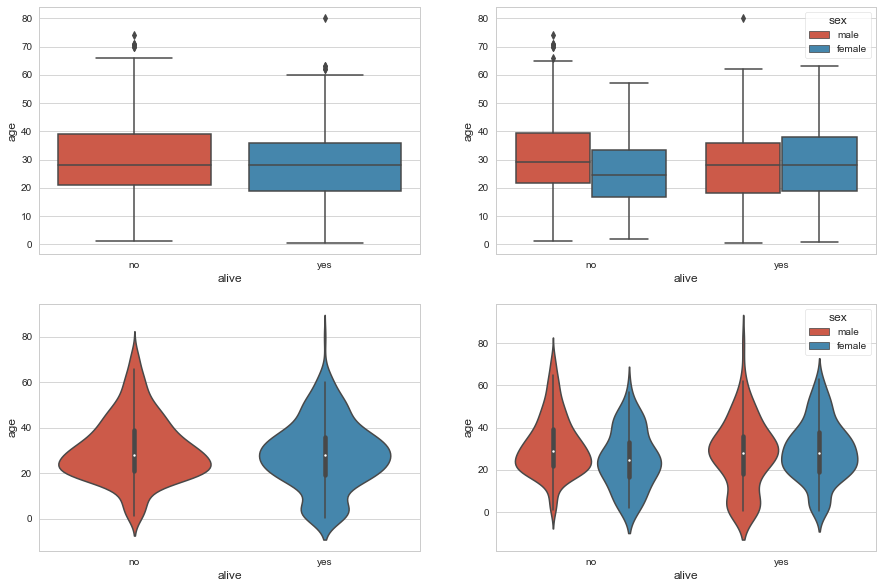

In [104]:
sns.set_style('whitegrid')

fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.boxplot(x = 'alive', y = 'age', data = titanic, ax = ax1)
sns.boxplot(x = 'alive', y = 'age', hue = 'sex', data = titanic, ax = ax2)   #hue: 또 다른 칼럼 참고해서 분류 (색으로)
sns.violinplot(x = 'alive', y = 'age', data = titanic, ax = ax3)
sns.violinplot(x = 'alive', y = 'age', hue = 'sex', data = titanic, ax = ax4)

plt.show()

### Pairplot

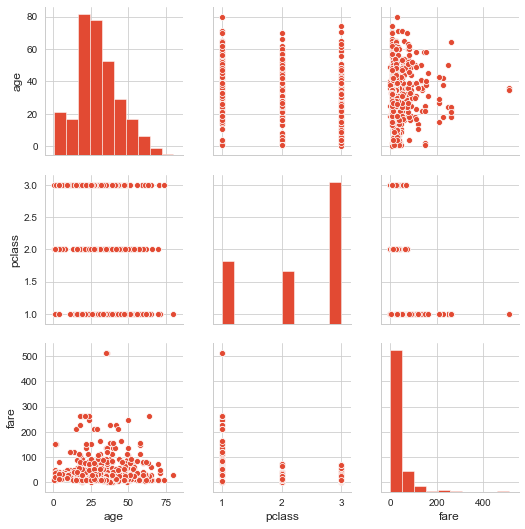

In [108]:
sns.set_style('whitegrid')

titanic_pair = titanic[['age', 'pclass', 'fare']]

g = sns.pairplot(titanic_pair)

# Folium

In [109]:
import folium

In [143]:
seoul_map = folium.Map(location = [37.55, 126.98], zoom_start = 12) #tiles = 'Stamen Terrain', 'Stamen Toner'

In [110]:
seoul_map.save('./output/seoul.html')

In [111]:
? folium.Map

In [126]:
seoul_map2 = folium.Map(location = [37.55, 126.98], tiles = 'Stamen Terrain', zoom_start = 12)

In [122]:
seoul_map2

In [117]:
seoul_map3 = folium.Map(location = [37.55, 126.98], tiles = 'Stamen Toner', zoom_start = 12)

In [118]:
seoul_map3

In [124]:
seoul_map4 = folium.Map(location = [37.55, 126.98], tiles = 'Mapbox Bright', zoom_start = 12)

In [127]:
df = pd.read_excel('./datas/서울지역 대학교 위치.xlsx')

In [134]:
df.set_index('Unnamed: 0', inplace = True)

In [135]:
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup = name).add_to(seoul_map)

In [136]:
seoul_map

In [137]:
seoul_map.save('./datas/seoul_colleges.html')

In [144]:
#마커 변경
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng], radius = 10, color = "orange", fill = True, fill_color = "black", fill_opacity = 0.5,  popup = name).add_to(seoul_map)
seoul_map

In [147]:
df = pd.read_excel('./datas/경기도인구데이터.xlsx', index_col = '구분')

In [150]:
df.columns = df.columns.map(str)

In [152]:
import json

In [155]:
geo_data = json.load(open('./datas/경기도행정구역경계.json', encoding = 'utf-8'))

In [156]:
geo_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': 31380,
    'name': '양평군',
    'name_eng': 'Yangpyeong-gun',
    'base_year': 2013},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.56113535909492, 37.6256560539258],
      [127.57290963929243, 37.61087369350498],
      [127.56366973908277, 37.5842624297699],
      [127.52226606559191, 37.5828628697518],
      [127.50048767007603, 37.569036373178626],
      [127.47687473909174, 37.574448241913856],
      [127.47565866803647, 37.60512112601634],
      [127.44699730711024, 37.64497584741164],
      [127.4272349102434, 37.66284420898682],
      [127.40156700708162, 37.64806970784708],
      [127.3732642199939, 37.6453987554284],
      [127.3542931884407, 37.6250006376975],
      [127.34360057873045, 37.588997440929354],
      [127.31002843450217, 37.53523876142835],
      [127.30923294884336, 37.5135706079458],
      [127.32809611134748, 37.53133849534739],
      [127.3663244453597, 37.5

In [157]:
gyeongi_map = folium.Map(location = [37.5502, 126.982], tiles = 'Stamen Terrain', zoom_start = 9)

In [163]:
df.index

Index(['수원시장안구', '수원시권선구', '수원시팔달구', '수원시영통구', '성남시수정구', '성남시중원구', '성남시분당구',
       '의정부시', '안양시만안구', '안양시동안구', '부천시원미구', '부천시소사구', '부천시오정구', '광명시', '평택시',
       '동두천시', '안산시상록구', '안산시단원구', '고양시덕양구', '고양시일산동구', '고양시일산서구', '과천시',
       '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시처인구', '용인시기흥구',
       '용인시수지구', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시',
       '연천군', '가평군', '양평군'],
      dtype='object', name='구분')

In [164]:
? folium.Choropleth

In [165]:
year = '2017'

folium.Choropleth(geo_data=geo_data,
                        data= df[year],
                        columns = [df.index, df[year]],
                        fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                        threshold_scale=[10000, 100000, 300000, 500000, 700000],
                        key_on = 'feature.properties.name').add_to(gyeongi_map)

In [166]:
gyeongi_map

In [167]:
gyeongi_map.save('./datas/gyeongi2017pop.html')